In [1]:
setwd('./')

In [4]:
da1 = read.table('./GSE98816_Brain_samples_normalized_counts_matrix.txt',header =T,sep = '\t',row.names = 1)

In [5]:
head(da1,2)

,Brain.Mural3_A13,Brain.Mural3_A14,Brain.Mural3_A6,Brain.Mural3_A2,Brain.Mural3_A9,Brain.Mural3_A5,Brain.Mural3_A20,Brain.Mural3_A8,Brain.Mural3_A1,Brain.Mural3_A15,...,Brain.Pdgfra2_P1,Brain.Pdgfra2_P7,Brain.Pdgfra2_P13,Brain.Pdgfra2_P14,Brain.Pdgfra2_P16,Brain.Pdgfra2_P15,Brain.Pdgfra2_P17,Brain.Pdgfra2_P19,Brain.Pdgfra2_P23,Brain.Pdgfra2_P24
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Adora1,0,0,0,0,0,0,0,0,0,0,...,115,0,48,246,0,184,0,408,115,66
Sntg1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
da2 = read.table('./count.txt',header =F,sep = '\t')

In [7]:
head(da2,2)

,V1,V2
,<chr>,<chr>
1,GSM2612539,Brain.EC3_A10
2,GSM2612540,Brain.EC3_A11


In [8]:
da3 = read.table('./celltype.txt',header =T,sep = '\t')

In [ ]:
library(dplyr)

da4 = da3 %>% dplyr::filter(tissue.origin == 'Brain')

In [14]:
head(da4,3)

,GSM.ID,age,tissue.origin,annoated.cell.types
,<chr>,<chr>,<chr>,<chr>
1,GSM2612539,adult,Brain,aEC
2,GSM2612540,adult,Brain,capilEC
3,GSM2612541,adult,Brain,aEC


In [15]:
da5 = merge(da4,da2,by.x = 'GSM.ID',by.y = 'V1')

In [16]:
head(da5,2)

,GSM.ID,age,tissue.origin,annoated.cell.types,V2
,<chr>,<chr>,<chr>,<chr>,<chr>
1,GSM2612539,adult,Brain,aEC,Brain.EC3_A10
2,GSM2612540,adult,Brain,capilEC,Brain.EC3_A11


In [19]:
da6 = as.data.frame(t(da1)) %>% tibble::rownames_to_column(.,'V2')

In [20]:
head(da6,2)

,V2,Adora1,Sntg1,Prim2,Bai3,Cflar,Gpr39,Obsl1,Syt14,Pld5,...,Emx2,Rab11fip2,Fam204a,Eif3a,Nanos1,Prdx3,Sfxn4,Gm7102,Csf2ra,eGFP
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,Brain.Mural3_A13,0,0,0,0,0,0,54,0,0,...,0,0,227,0,3,0,0,0,0,957
2,Brain.Mural3_A14,0,0,0,0,0,0,0,0,0,...,0,0,0,490,0,242,0,0,0,1250


In [24]:
da7 = merge(da5,da6,by = 'V2')

In [33]:
head(da7,4)

,V2,GSM.ID,age,tissue.origin,annoated.cell.types,Adora1,Sntg1,Prim2,Bai3,Cflar,...,Emx2,Rab11fip2,Fam204a,Eif3a,Nanos1,Prdx3,Sfxn4,Gm7102,Csf2ra,eGFP
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,Brain.EC3_A1,GSM2612548,adult,Brain,EC1,0,0,0,0,0,...,0,0,0,594,1,76,0,0,0,13298
2,Brain.EC3_A10,GSM2612539,adult,Brain,aEC,0,0,0,0,264,...,0,0,0,165,0,1,4,0,0,25584
3,Brain.EC3_A11,GSM2612540,adult,Brain,capilEC,0,0,0,0,17,...,0,0,0,101,0,0,0,0,0,19609
4,Brain.EC3_A12,GSM2612541,adult,Brain,aEC,0,0,0,0,197,...,0,0,0,35,0,197,0,0,0,15256


In [34]:
meta = da7[,c(2,5)]

In [31]:
se = da7[,c(2,6:19942)] %>% tibble::column_to_rownames(.,'GSM.ID') %>% t() %>% as.data.frame()

In [36]:
library(Seurat)

Warning message:
"package 'Seurat' was built under R version 4.2.3"
The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

Attaching SeuratObject



In [37]:
scRNA <- CreateSeuratObject(counts = se)
scRNA

An object of class Seurat 
19937 features across 3186 samples within 1 assay 
Active assay: RNA (19937 features, 0 variable features)

In [42]:
scRNA@meta.data$celltype = meta$annoated.cell.types

In [58]:
immune.combined = scRNA

In [59]:
immune.combined <-NormalizeData(immune.combined)
immune.combined <- ScaleData(immune.combined,feature=rownames(immune.combined), verbose = FALSE)
immune.combined <- FindVariableFeatures(object = immune.combined,selection.method = 'vst', nfeatures = 2000)
immune.combined <- RunPCA(immune.combined,  features = VariableFeatures(object = immune.combined) ,verbose = FALSE)
immune.combined <- RunUMAP(immune.combined, reduction = "pca", dims = 1:20)
immune.combined <- RunTSNE(immune.combined, reduction = "pca", dims = 1:20)
immune.combined <- FindNeighbors(immune.combined, reduction = "pca", dims = 1:20)
immune.combined <- FindClusters(immune.combined)

Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"
03:52:14 UMAP embedding parameters a = 0.9922 b = 1.112

03:52:14 Read 3186 rows and found 20 numeric columns

03:52:14 Using Annoy for neighbor search, n_neighbors = 30

03:52:14 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

03:52:14 Writing NN index file to temp file /tmp/Rtmp0S93KQ/file3bc8e133e0b20

03:52:14 Searching Annoy index using 1 thread, search_k = 3000

03:52:15 Annoy recall = 100%

03:52:15 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors 

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3186
Number of edges: 120973

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8133
Number of communities: 12
Elapsed time: 0 seconds


In [60]:
scRNA = immune.combined

In [61]:
DefaultAssay(scRNA) = 'RNA'

In [62]:
Idents(scRNA)  = 'celltype'

In [72]:
gene = c('Cxcl2','Cxcl4','Cxcl5','Cxcl8','Ccl2','Ccl5l','Ccl','Ccl19','Ccl21','Lgals3','Mcp1')

In [75]:
gene2  =c('Pf4',
'Il8',
'Ccl2',
'Ccl3',
'Ccl5',
'Ccl7',
'Ccl8',
'Ccl11',
'Elc',
'Mip3B',
'Slc',
'Scya21',
'Cxcl1',
'Cxcl2',
'Cxcl4',
'Cxcl5',
'Cxcl10',
'Cxcl12',
'Cxcr2',
'Cxcr4',
'Il6',
'Il17',
'Mif',
'Cd62l',
'Sell',
'Ccr1',
'Ccr2',
'Ccr5',
'Ltb4r'
)

In [80]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 4.2.3"


In [84]:
options(repr.plot.width = 9)

Warning message in FetchData.Seurat(object = object, vars = features, cells = cells):
"The following requested variables were not found: Il8, Elc, Mip3B, Slc, Scya21, Cxcl4, Il17, Cd62l, Ltb4r"


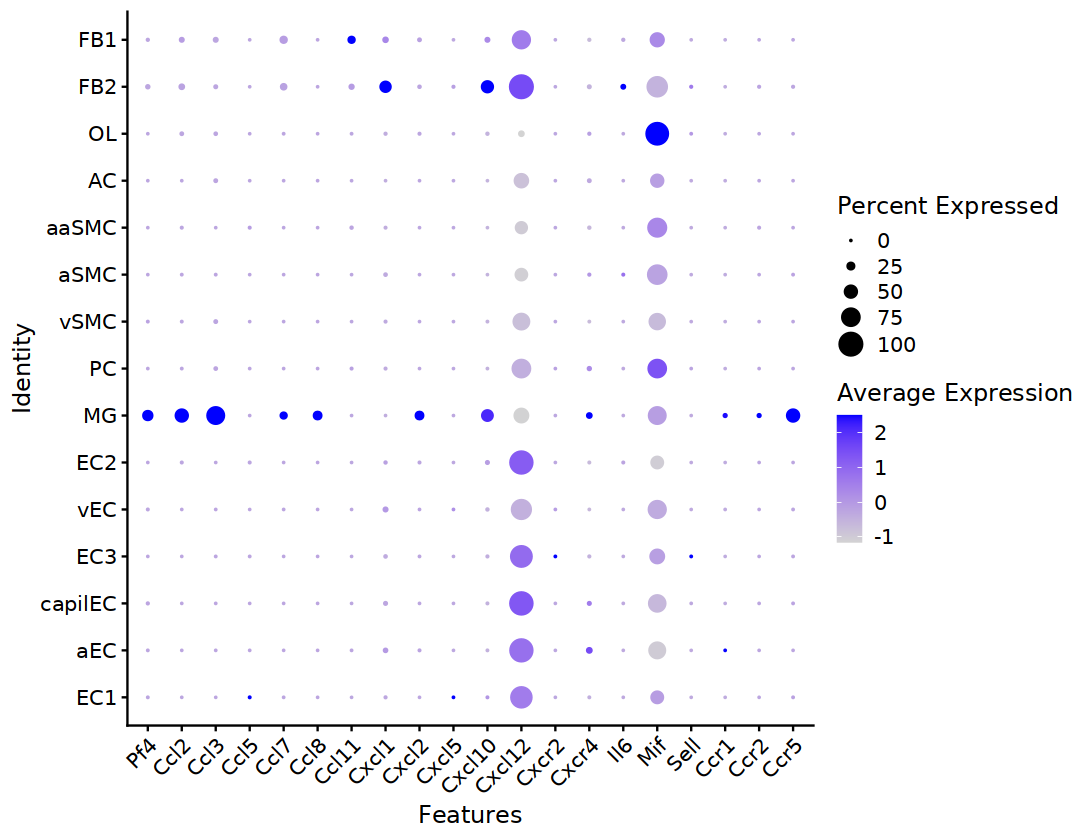

In [85]:
DotPlot(scRNA,features = gene2)+ theme(axis.text.x = element_text(angle=45, hjust=1, vjust=1))